# Projets Expérimentaux Scientifiques

### UE PHY3099L | L3 physique, parcours ingénierie physique
### Projet : Diffusion

#### M. MADI, E. GAUVIN, S. SERRANO

## Importation des modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema

## Création des listes des différentes séries de mesure

In [5]:
# Écrémé 100%
ep_1 = np.array([10.323, 10.656, 11.1888, 11.8548, 12.0213, 11.6883, 11.2887, 10.5894, 10.1232, 10.7892,
                   11.0556, 11.3886, 11.8881, 12.321, 11.3886, 10.656, 10.1898, 9.7236, 9.7902])
ep_2 = np.array([10.7226, 10.8891, 11.4219, 12.0546, 12.321, 11.988, 11.3886, 10.8225, 10.323, 10.1898,
                   11.0556, 11.5218, 11.8548, 12.0546, 11.322, 10.8558, 10.2564, 9.7902, 9.7236])
ep_mean = (ep_1 + ep_2)/2

# Entier | facteur 50
ent50_1 = np.array([1.49184, 2.01132, 3.10356, 4.2957, 4.995, 4.8618, 4.0626, 2.8305, 1.83816, 1.49184,
                    1.94472, 3.0636, 4.1292, 4.8285, 4.6287, 3.7629, 2.7306, 1.75824, 1.38528])
ent50_2 = np.array([1.49184, 2.10456, 3.22344, 4.2957, 5.0283, 4.8618, 4.0626, 2.82384, 1.8648, 1.54512,
                    2.02464, 3.09024, 4.1292, 4.8951, 4.6287, 3.8295, 2.7306, 1.75824, 1.41192])
ent50_mean = (ent50_1 + ent50_2)/2

# Entier | facteur 100
ent100_1 = np.array([0.88245, 1.0989, 1.61172, 2.17116, 2.55744, 2.41716, 1.98516, 1.35384, 0.92241, 0.78471,
                     0.92241, 1.42644, 1.94856, 2.27049, 2.18625, 1.83909, 1.3092, 0.87579, 0.71331])
ent100_2 = np.array([1.05228, 1.21212, 1.665, 2.05128, 2.31768, 2.18424, 1.83909, 1.38882, 1.10556, 0.93177,
                     1.1406, 1.57821, 1.92519, 2.1396, 2.03802, 1.83909, 1.3092, 1.01664, 0.87579])
ent100_mean = (ent100_1 + ent100_2)/2


# Entier 100%
entp_1 = np.array([8.4582, 8.325, 8.4249, 8.2917, 8.2584, 8.0586, 7.8921, 7.8255, 8.4582, 8.8911,
                      9.0911, 9.1244, 9.191, 8.8245, 7.8588, 7.3242, 7.3242, 7.524, 7.6572])
entp_2 = np.array([8.8911, 8.658, 8.5248, 8.658, 8.5581, 8.3916, 8.2584, 8.1918, 8.1252, 8.2584,
                      8.3916, 8.7246, 8.658, 8.3916, 8.0586, 7.5915, 7.3917, 7.524, 7.9917])
entp_mean = (entp_1 + entp_2)/2

# Entier | facteur 1000
ent1000_1 = np.array([0.053, 0.0984, 0.186, 0.29, 0.348, 0.344, 0.268, 0.17, 0.092,
                      0.056, 0.093, 0.183, 0.266, 0.313, 0.309, 0.248, 0.156, 0.088, 0.0536])
ent1000_2 = np.array([0.058, 0.1, 0.196, 0.288, 0.34, 0.334, 0.264, 0.169, 0.084,
                      0.056, 0.1, 0.184, 0.282, 0.338, 0.32, 0.256, 0.162, 0.09, 0.06])
ent1000_3 = np.array([0.068, 0.11, 0.2, 0.292, 0.34, 0.328, 0.264, 0.174, 0.096,
                      0.068, 0.108, 0.194, 0.276, 0.328, 0.316, 0.25, 0.158, 0.09, 0.068])
ent1000_mean = (ent1000_1 + ent1000_2+ ent1000_3)/3


# Entier | facteur 10
ent10_1 = np.array([8.5248, 9.0576, 10.1232, 11.4552, 11.988, 11.7216, 10.9224, 9.5904, 8.5248,
                    9.0576, 9.8568, 10.9224, 12.5208, 12.7872, 12.5208, 11.1888, 9.5904, 8.2584, 7.992])
ent10_2 = np.array([8.5248, 9.324, 10.656, 11.7216, 12.7872, 12.2544, 11.4552, 9.8568, 9.1908,
                    9.0576, 9.8568, 10.656, 12.2544, 12.5874, 11.7216, 10.7892, 9.324, 8.2584, 7.992])
ent10_3 = np.array([8.7912, 9.0576, 10.3896, 11.7216, 12.3876, 11.988, 11.1888, 9.8568, 9.0576,
                    8.7912, 9.324, 10.656, 11.7216, 11.988, 11.7216, 10.656, 9.324, 8.3916, 8.1252])
ent10_mean = (ent10_1 + ent10_2+ ent10_3)/3

# Entier | facteur 500
ent500_1 = np.array([0.13, 0.196, 0.344, 0.51, 0.616, 0.6, 0.488, 0.32, 0.184,
                     0.138, 0.204, 0.374, 0.536, 0.648, 0.624, 0.5, 0.334, 0.192, 0.128])
ent500_2 = np.array([0.154, 0.212, 0.356, 0.524, 0.63, 0.625, 0.502, 0.334, 0.204,
                     0.158, 0.226, 0.38, 0.55, 0.628, 0.594, 0.468, 0.344, 0.234, 0.164])
ent500_mean = (ent500_1 + ent500_2)/2

# Entier | facteur 2500
ent2500_1 = np.array([0.03, 0.046, 0.092, 0.13, 0.164, 0.156, 0.128, 0.084, 0.044,
                      0.028, 0.044, 0.092, 0.14, 0.168, 0.16, 0.132, 0.083, 0.048, 0.03])
ent2500_2 = np.array([0.03, 0.048, 0.093, 0.136, 0.158, 0.16, 0.128, 0.084, 0.044,
                      0.028, 0.048, 0.089, 0.135, 0.165, 0.16, 0.125, 0.082, 0.043, 0.03])
ent2500_mean = (ent2500_1 + ent2500_2)/2

# Entier | facteur 5000
ent5000_1 = np.array([0.022, 0.033, 0.061, 0.088, 0.104, 0.1, 0.084, 0.0536, 0.03,
                      0.023, 0.036, 0.06, 0.09, 0.103, 0.095, 0.08, 0.055, 0.033, 0.025])
ent5000_2 = np.array([0.024, 0.033, 0.065, 0.091, 0.11, 0.108, 0.087, 0.059, 0.033,
                      0.024, 0.036, 0.061, 0.091, 0.108, 0.104, 0.085, 0.055, 0.034, 0.027])
ent5000_mean = (ent5000_1 + ent5000_2)/2

# Eau du robinet | Lentille f=15mm
eau_1 = np.array([0.016, 0.017, 0.0192, 0.0214, 0.023, 0.023, 0.022, 0.0194, 0.017,
                  0.016, 0.0165, 0.0198, 0.023, 0.024, 0.0238, 0.021, 0.018, 0.016, 0.0158])
eau_2 = np.array([0.0154, 0.016, 0.018, 0.0196, 0.0215, 0.0221, 0.0207, 0.018, 0.0165,
                  0.015, 0.0162, 0.0186, 0.0217, 0.0222, 0.0218, 0.02, 0.0178, 0.016, 0.0154])
eau_mean = (eau_1 + eau_2)/2

# Cuve vide
cuve_vide = np.array([0.015, 0.014, 0.0158, 0.016, 0.0152, 0.015, 0.015, 0.0152, 0.0158,
                      0.015, 0.015, 0.0148, 0.0152, 0.0156, 0.0154, 0.016, 0.0156, 0.0154, 0.015])

# Angle de polarisation par rapport à la verticale (en degrés)
theta_deg = np.array([3.8, 23.8, 43.8, 63.8, 83.8, 103.8, 123.8, 143.8, 163.8,
                      183.8, 203.8, 223.8, 243.8, 263.8, 283.8, 303.8, 323.8, 343.8, 363.8])

# Eau distillée
eaudist_1 = np.array([0.018, 0.02, 0.026, 0.03, 0.028, 0.027, 0.024, 0.021, 0.017,
                    0.016, 0.018, 0.025, 0.026, 0.029, 0.028, 0.024, 0.022, 0.017, 0.016])

eaudist_2 = np.array([0.015, 0.0165, 0.019, 0.022, 0.025, 0.024, 0.019, 0.017, 0.015,
                    0.014, 0.0155, 0.019, 0.022, 0.024, 0.023, 0.02, 0.018, 0.015, 0.0145])


## Définir l'ajustement, les bornes et les paramètres initiaux

In [7]:
def malus_lame_sin(theta, A, theta0, B):
    return A * np.sin(np.radians(theta - theta0))**2 + B

bounds = ([0.0,   -360.0,  0.0],[np.inf,  360.0, np.inf])
p0 = [0.5, 0.0, 0.2]

## Tracés

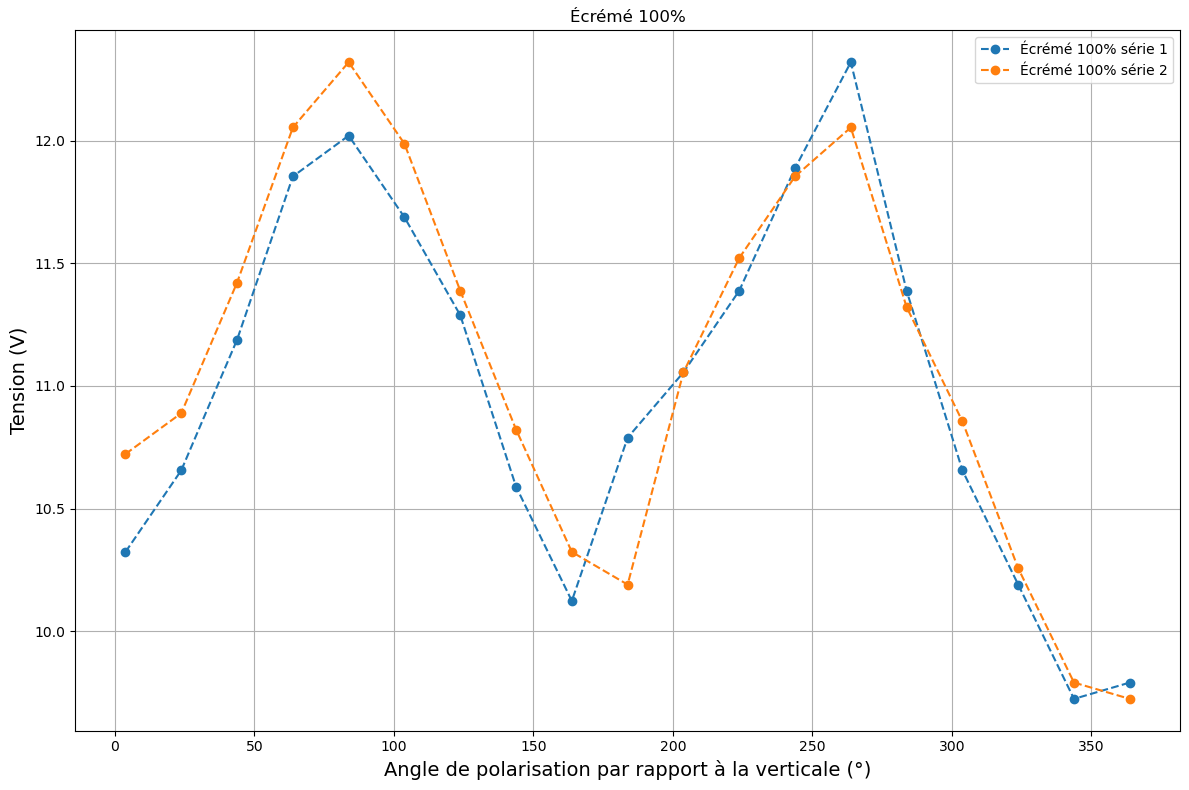

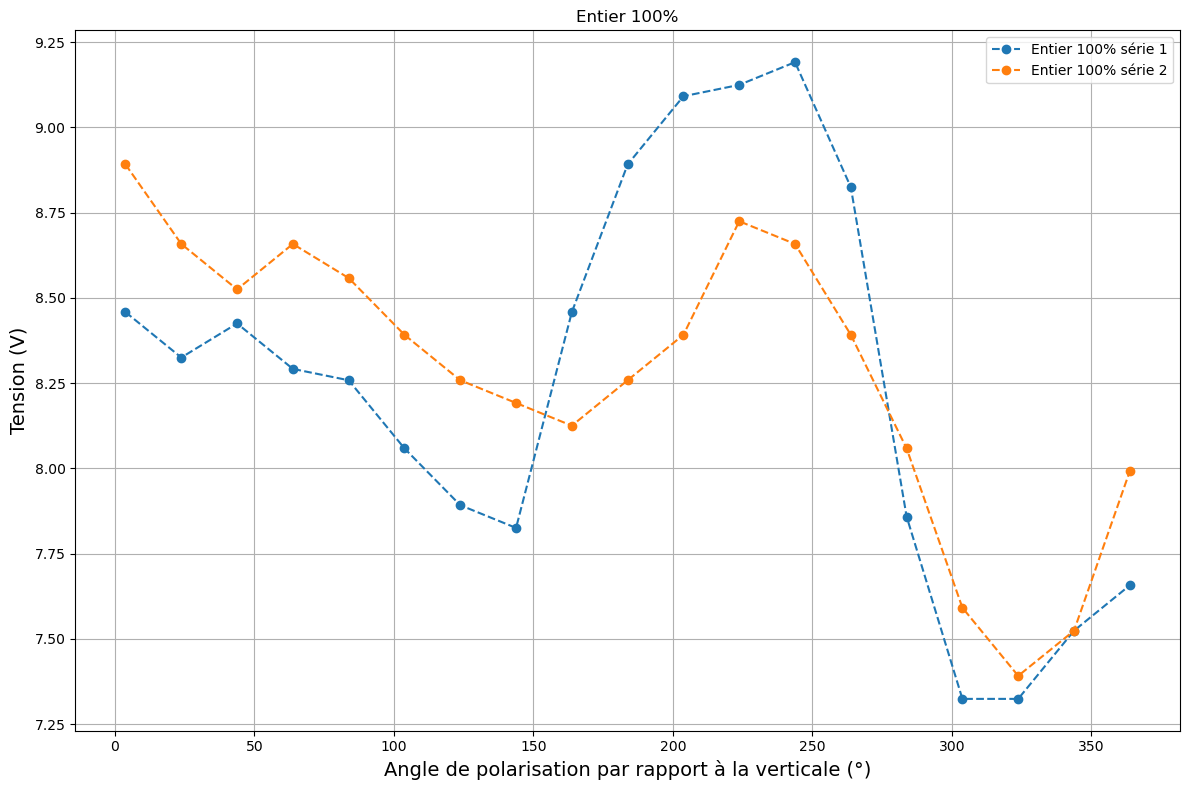

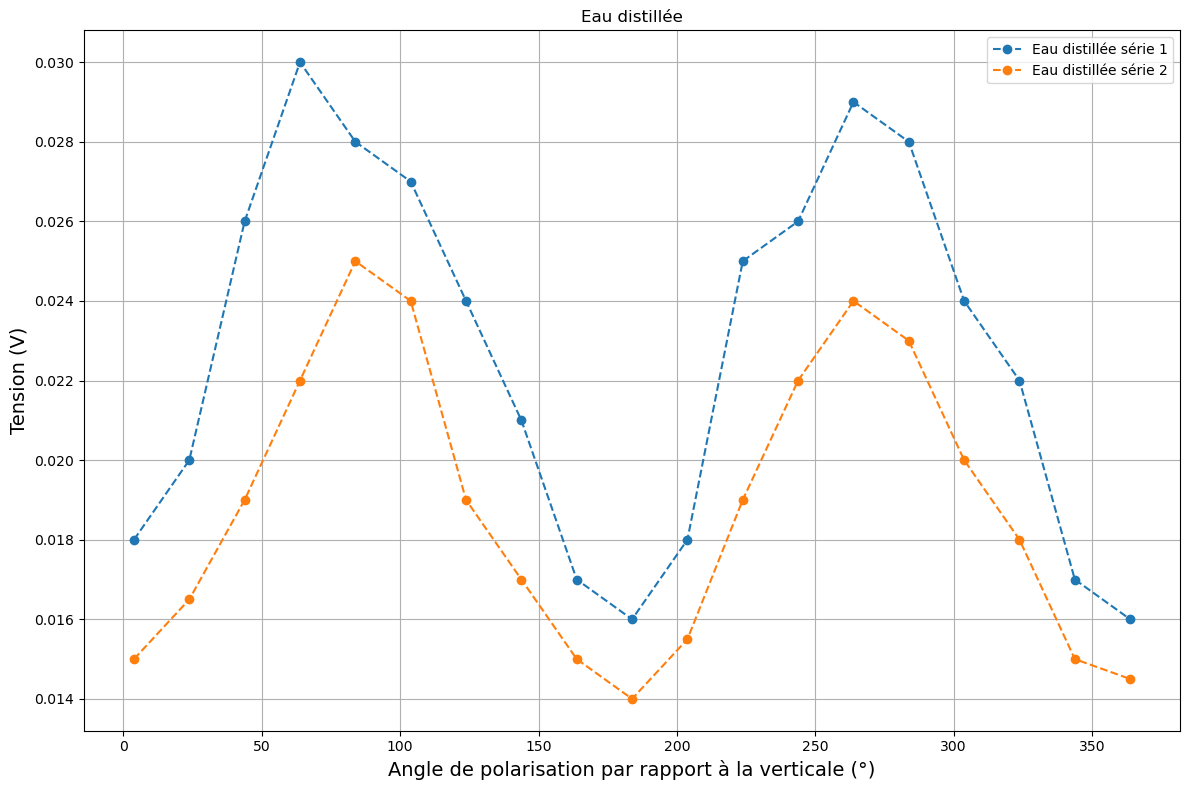

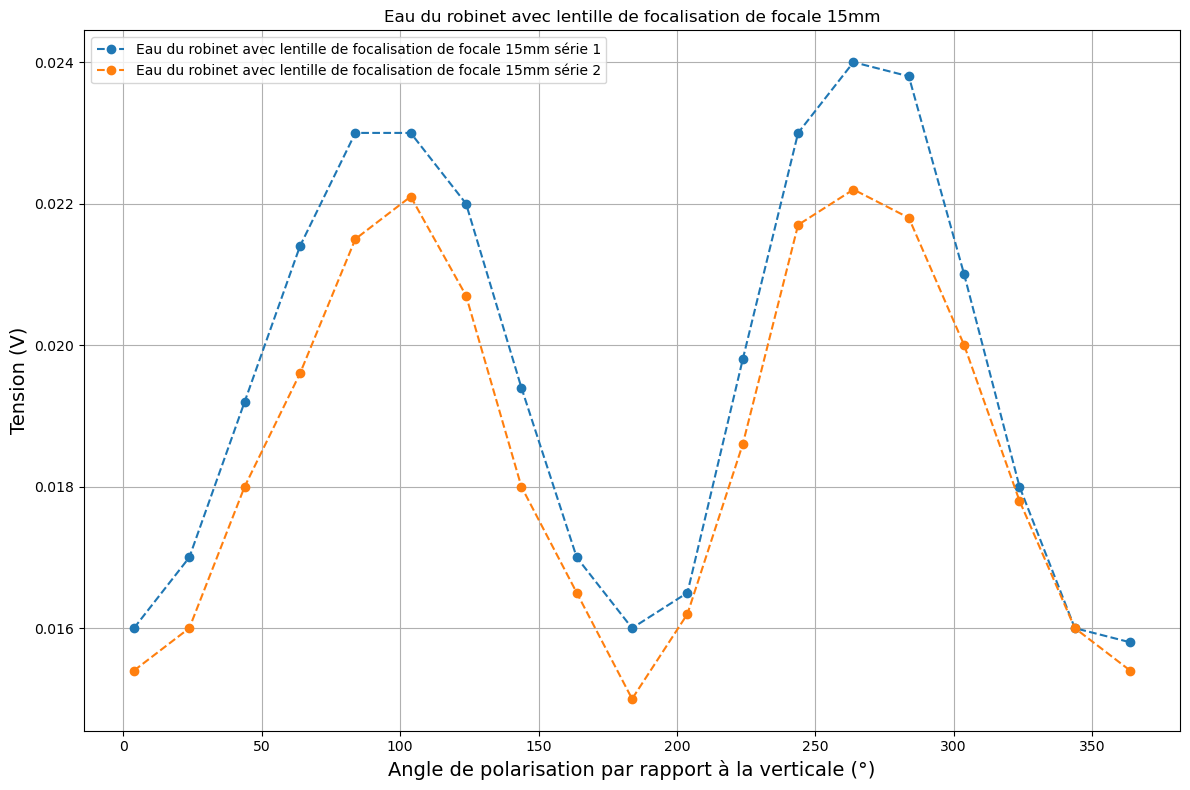

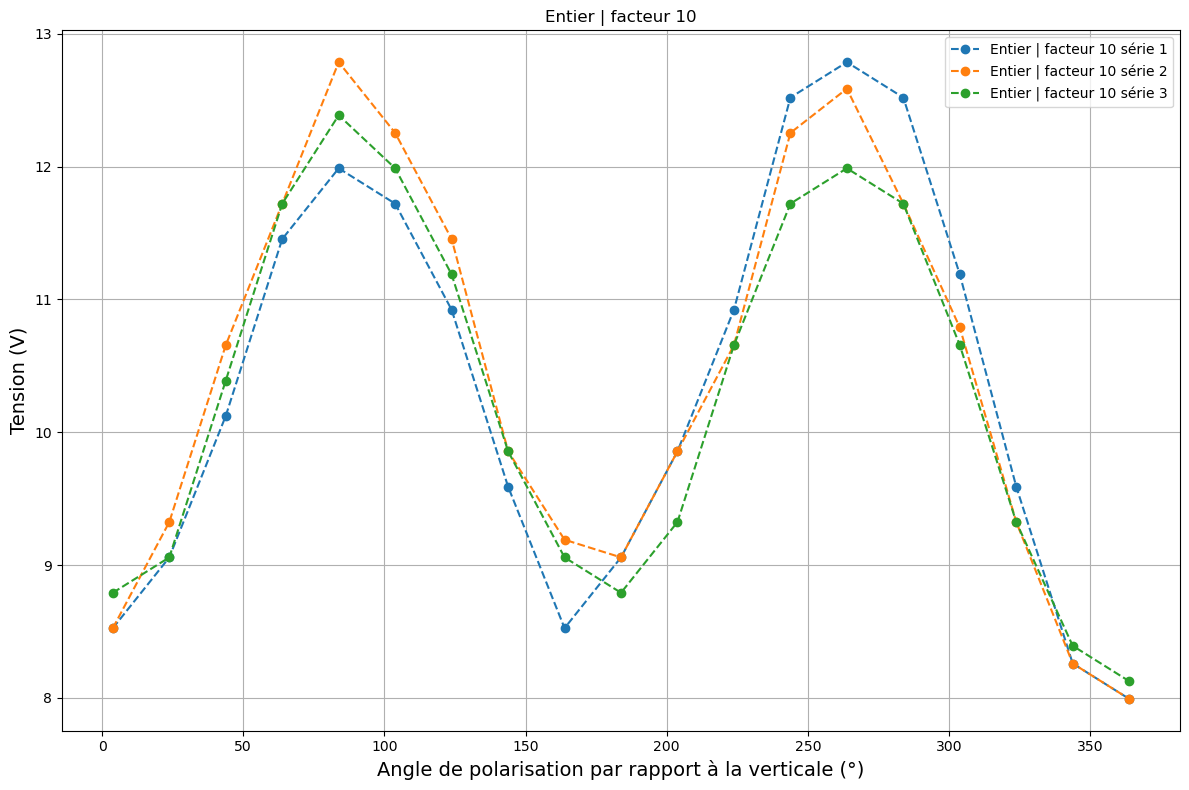

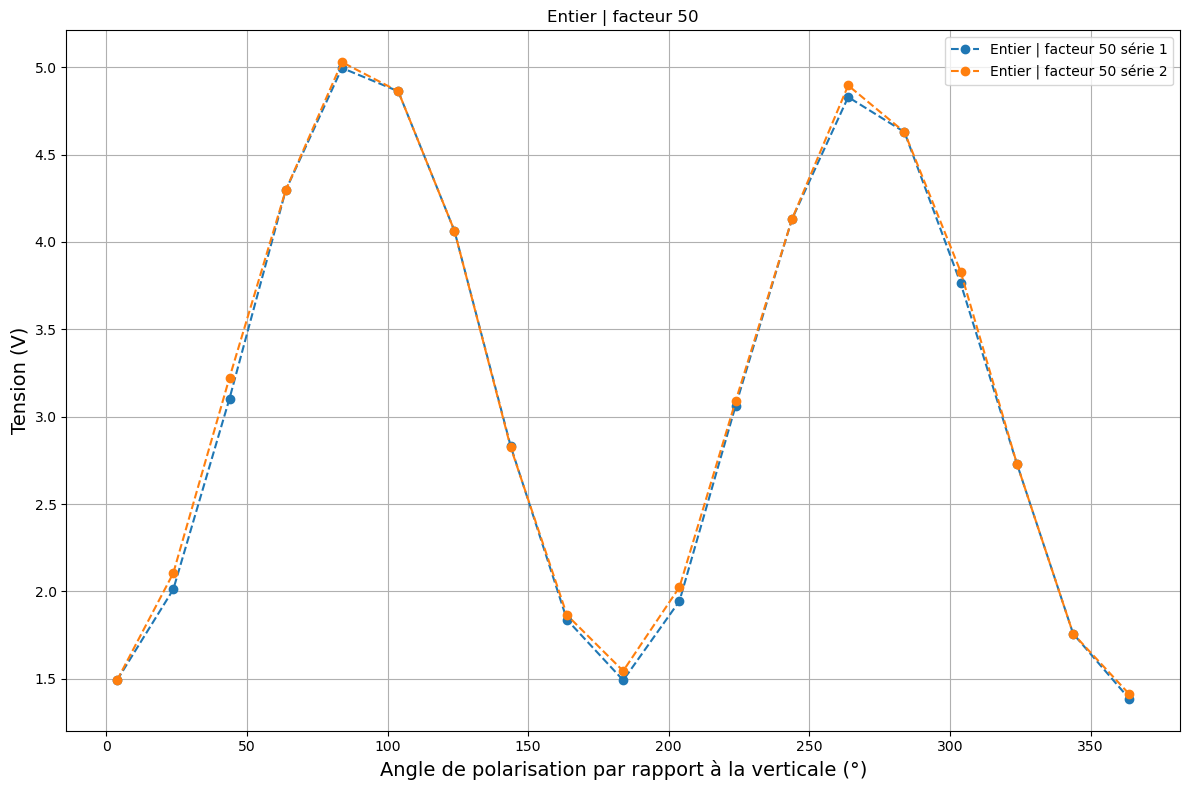

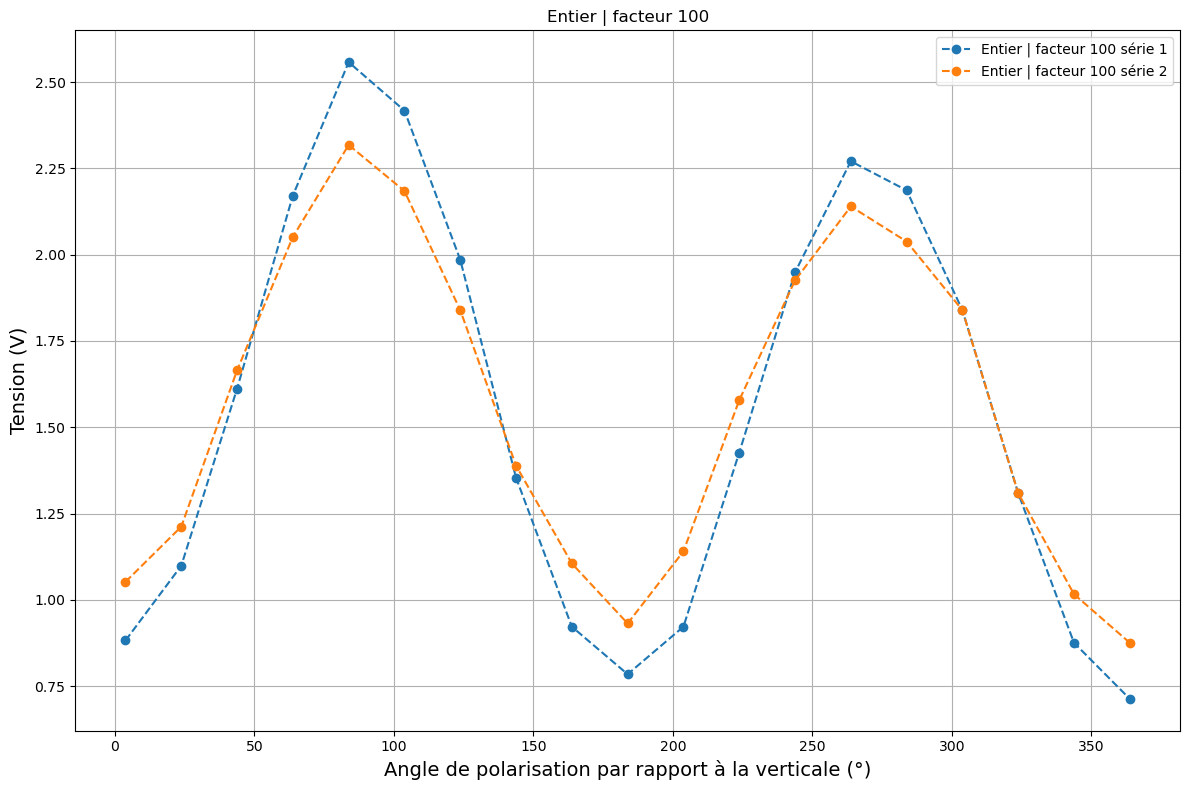

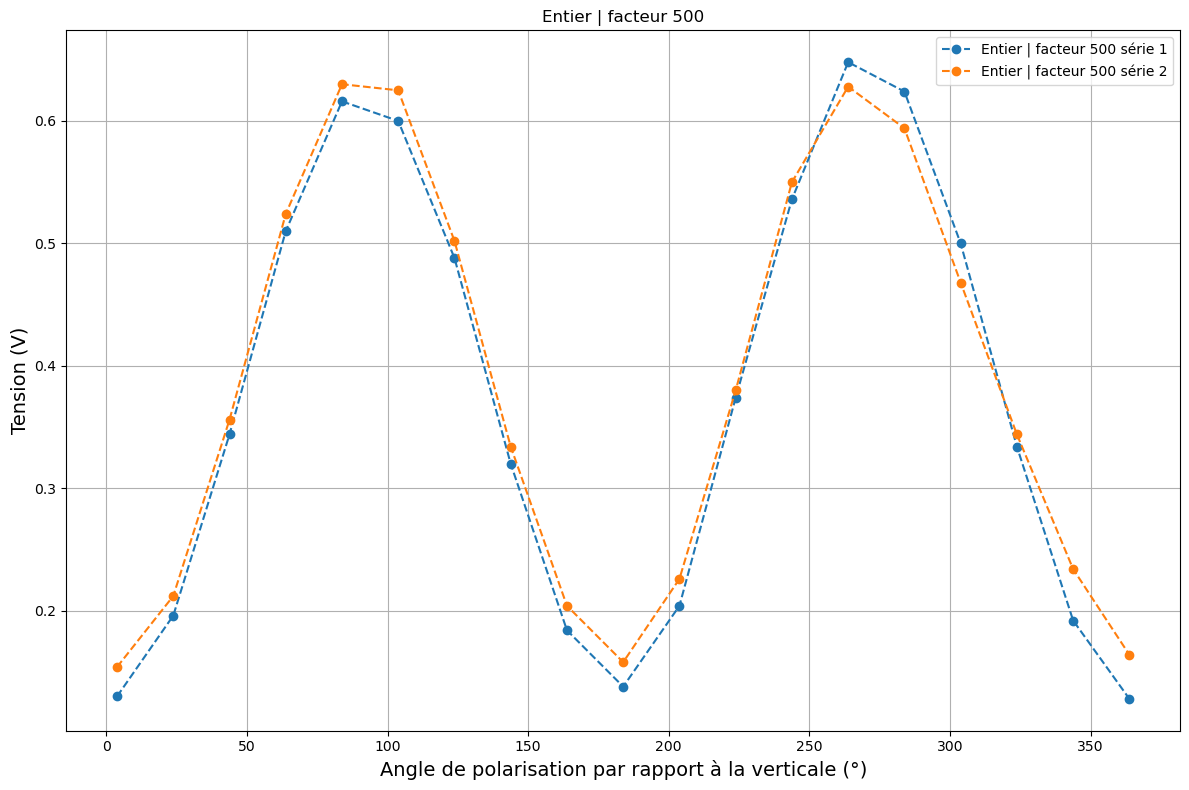

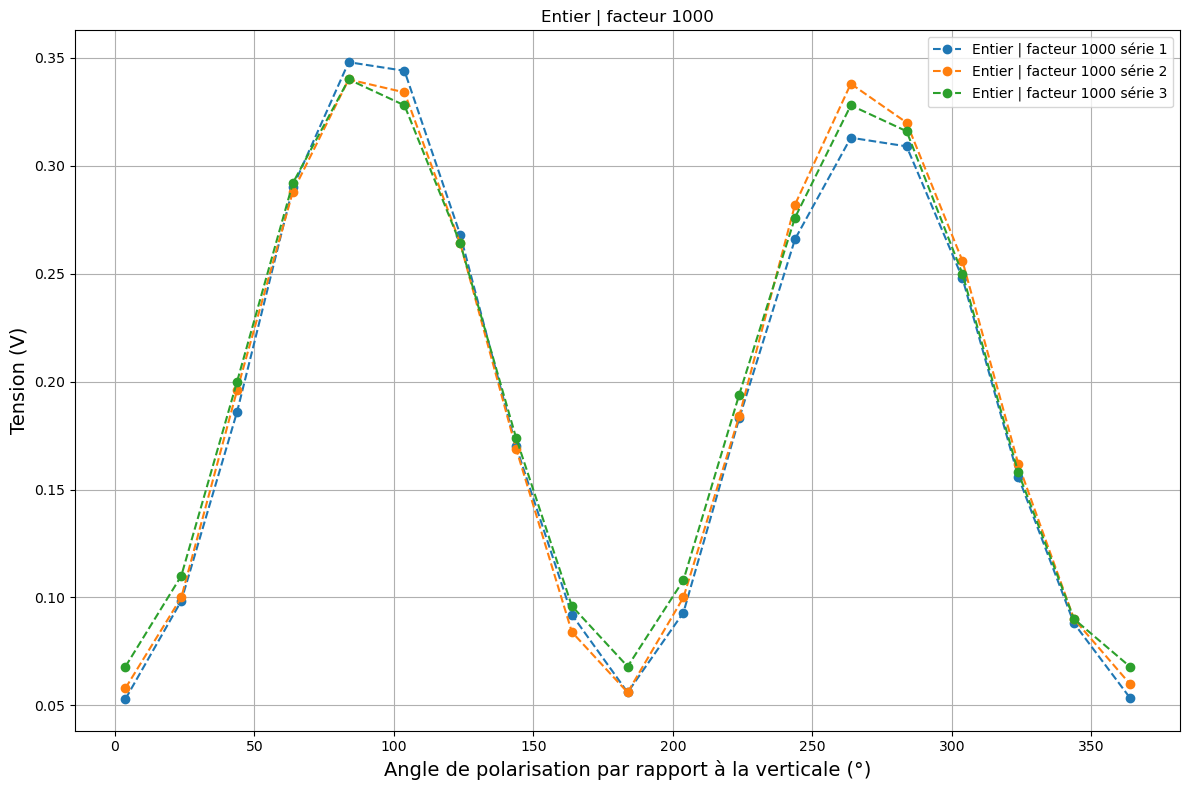

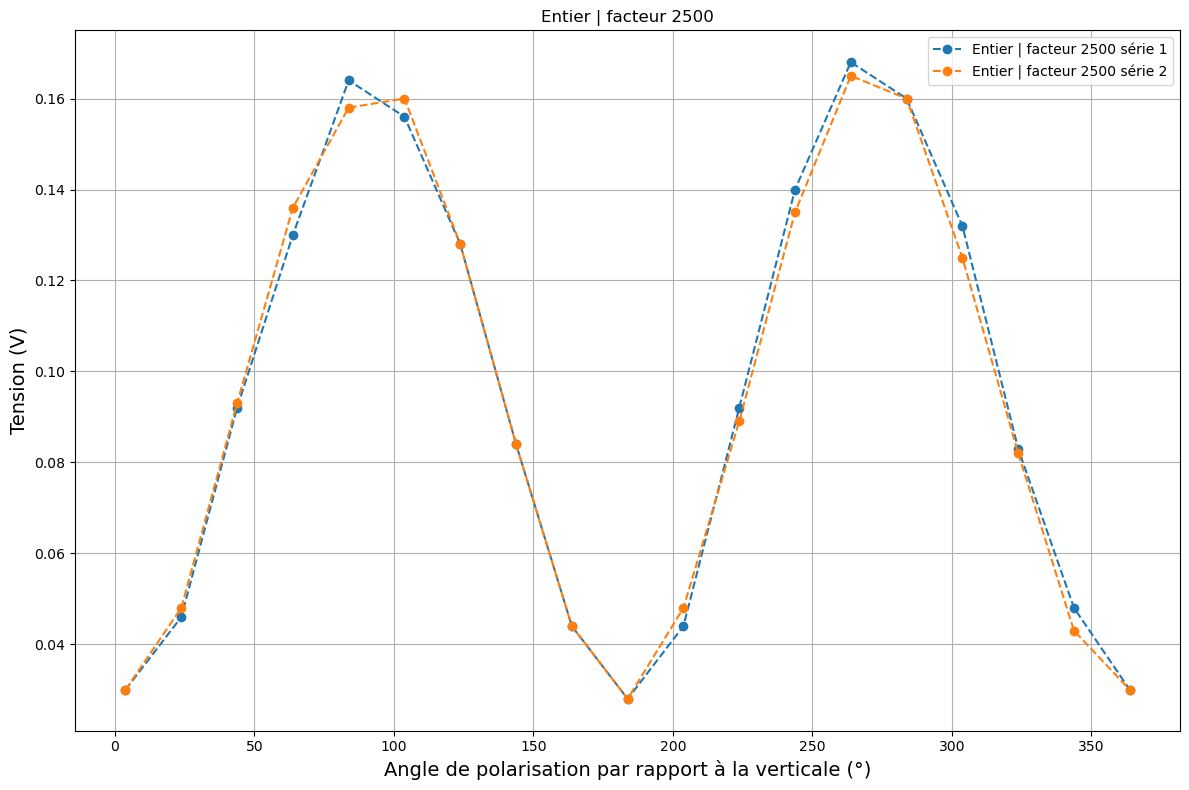

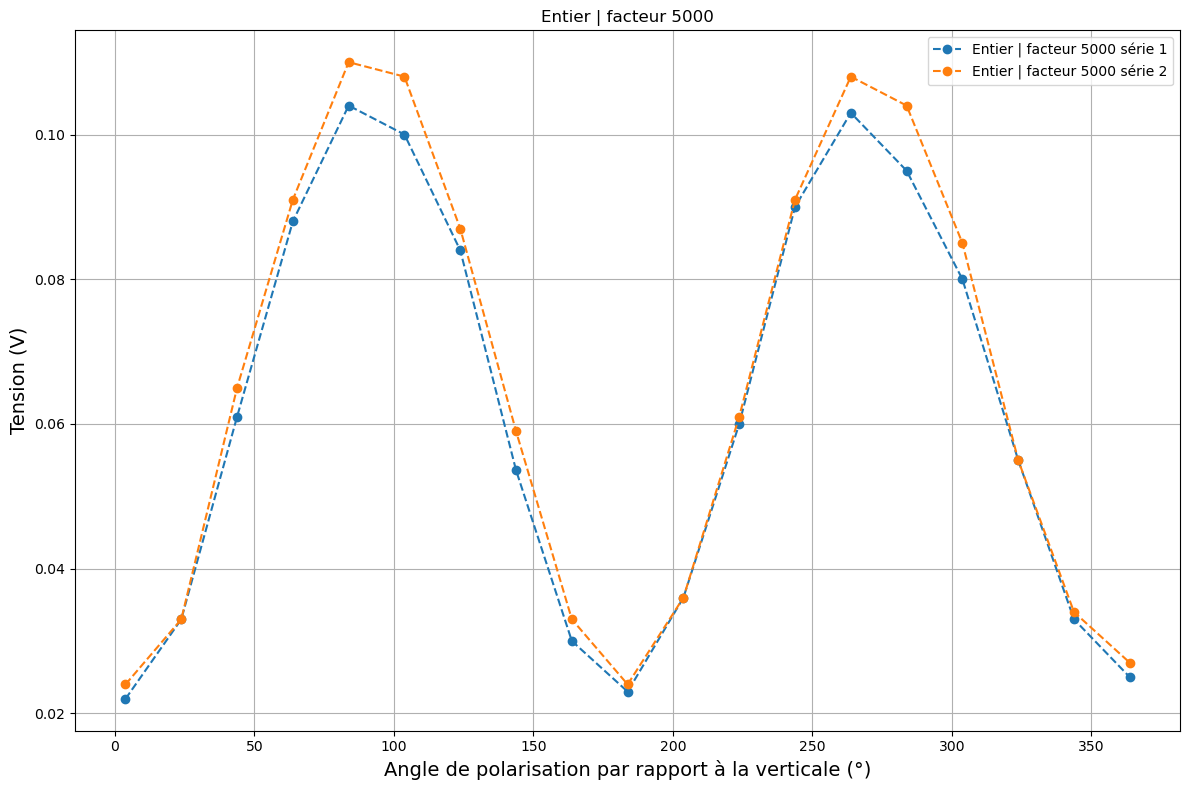

In [9]:
# Dictionnaire des séries par catégorie
series = {
    "Écrémé 100%": [ep_1, ep_2],
    "Entier 100%": [entp_1, entp_2],
    "Eau distillée": [eaudist_1, eaudist_2],
    "Eau du robinet avec lentille de focalisation de focale 15mm": [eau_1, eau_2],
    "Entier | facteur 10": [ent10_1, ent10_2, ent10_3],
    "Entier | facteur 50": [ent50_1, ent50_2],
    "Entier | facteur 100": [ent100_1, ent100_2],
    "Entier | facteur 500": [ent500_1, ent500_2],
    "Entier | facteur 1000": [ent1000_1, ent1000_2, ent1000_3],
    "Entier | facteur 2500": [ent2500_1, ent2500_2],
    "Entier | facteur 5000": [ent5000_1, ent5000_2]
}

# Boucle de tracé
for label, data_list in series.items():
    plt.figure(figsize=(12, 8))
    for idx, data in enumerate(data_list, start=1):
        plt.plot(theta_deg, data, linestyle='--', marker='o', label=f"{label} série {idx}")
    plt.title(f"{label}")
    plt.xlabel("Angle de polarisation par rapport à la verticale (°)", fontsize=14)
    plt.ylabel("Tension (V)", fontsize=14)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    filename = label.replace(" ", "_").replace("|", "").replace("/", "_") + ".png"
    plt.savefig(filename, dpi=300)  # enregistre la figure avec titre comme nom de fichier

plt.show()
